In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from math import ceil

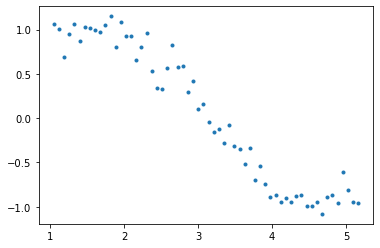

In [2]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])  # Sine Wave

np.random.seed(10)  

y = np.sin(x) + np.random.normal(0,0.15,len(x))
# y = np.sin(x)

data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

In [3]:
for i in range(2,16):
    colname = f'x_{i}' 
    data[colname] = data['x']**i
    
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [4]:
def linear_regression(data, power):
    predictors=['x']
    predictors.extend([f'x_{i}' for i in range(2,power+1)])

    
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    
    plt.plot(data['x'],y_pred)
    plt.plot(data['x'],data['y'],'.')
    plt.title(f'Plot for power: {power}')
    
    mse = np.mean((y_pred-data['y'])**2)
    rss = np.sum((y_pred-data['y'])**2)
    ret = [mse]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return linreg.score(data[predictors],data['y']), linreg.coef_




(0.9724322686112024,
 array([-5.11776237,  4.72461234, -1.92856217,  0.33473526, -0.02065326]))

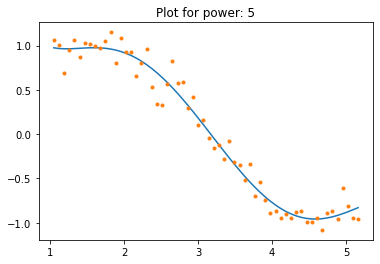

In [5]:
linear_regression(data, power=5)

In [6]:
# L2 Regularization
# alpha = lambda
def ridge_regression(data, power, alphas):
    # select x and x_n for n in [2,16) 
    predictors=['x']
    predictors.extend([f'x_{i}' for i in range(2,power+1)])
    
    n = 10
    rowcount = ceil(n/3)
    colcount = 3
    
    o = {}
    n = len(alphas)
    fig, ax = plt.subplots(rowcount, colcount, figsize=(15,15))
    for i, alpha in enumerate(alphas):
        
        ridgereg = Ridge(alpha=alpha)
        
        ridgereg.fit(data[predictors], data['y'])
        
        y_pred = ridgereg.predict(data[predictors])

        ax[i//3, i%3].plot(data['x'],y_pred)
        ax[i//3, i%3].plot(data['x'],data['y'],'.')
        ax[i//3, i%3].set_title(f'Plot for alpha: {alpha:.3g}')
    
        rss = sum((y_pred-data['y'])**2)
        ret = [rss]
        ret.extend([ridgereg.intercept_])
        ret.extend(ridgereg.coef_)
        o[alpha] = ret
    
    cellcount = rowcount * colcount
    for _ in range(i+1, cellcount):
        fig.delaxes(ax[_//3, _%3])
    return o

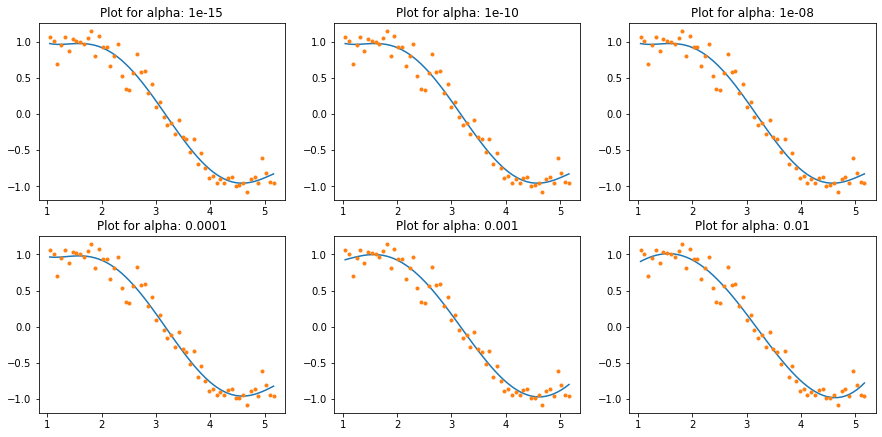

In [7]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2]
ridge_regression(data, 5, alpha_ridge);

In [8]:
def lasso_regression(data, power, alphas):
    predictors=['x']
    predictors.extend([f'x_{i}' for i in range(2,power)])
    
    o = {}
    n = len(alphas)
    fig, ax = plt.subplots(ceil(n/3),3, figsize=(15,15))
    for i, alpha in enumerate(alphas):
        
        lassoreg = Lasso(alpha=alpha)
        
        lassoreg.fit(data[predictors],data['y'])
        y_pred = lassoreg.predict(data[predictors])

        ax[i//3, i%3].plot(data['x'],y_pred)
        ax[i//3, i%3].plot(data['x'],data['y'],'.')
        ax[i//3, i%3].set_title(f'Plot for alpha: {alpha:.3g}')
    
        rss = sum((y_pred-data['y'])**2)
        ret = [rss]
        ret.extend([lassoreg.intercept_])
        ret.extend(lassoreg.coef_)
        o[alpha] = ret
    
    for _ in range(i+1, ceil(n/3)*3):
        fig.delaxes(ax[_//3, _%3])
    return o

/home/ryn/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5732149235922259, tolerance: 0.00369480384218441
  model = cd_fast.enet_coordinate_descent(
/home/ryn/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5802496552979077, tolerance: 0.00369480384218441
  model = cd_fast.enet_coordinate_descent(
/home/ryn/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6383334876761403, tolerance: 0.00369480384218441
  model = cd_fast.enet_coordinate_descent(
/home/ryn/.virtualenvs/datascience/lib/p

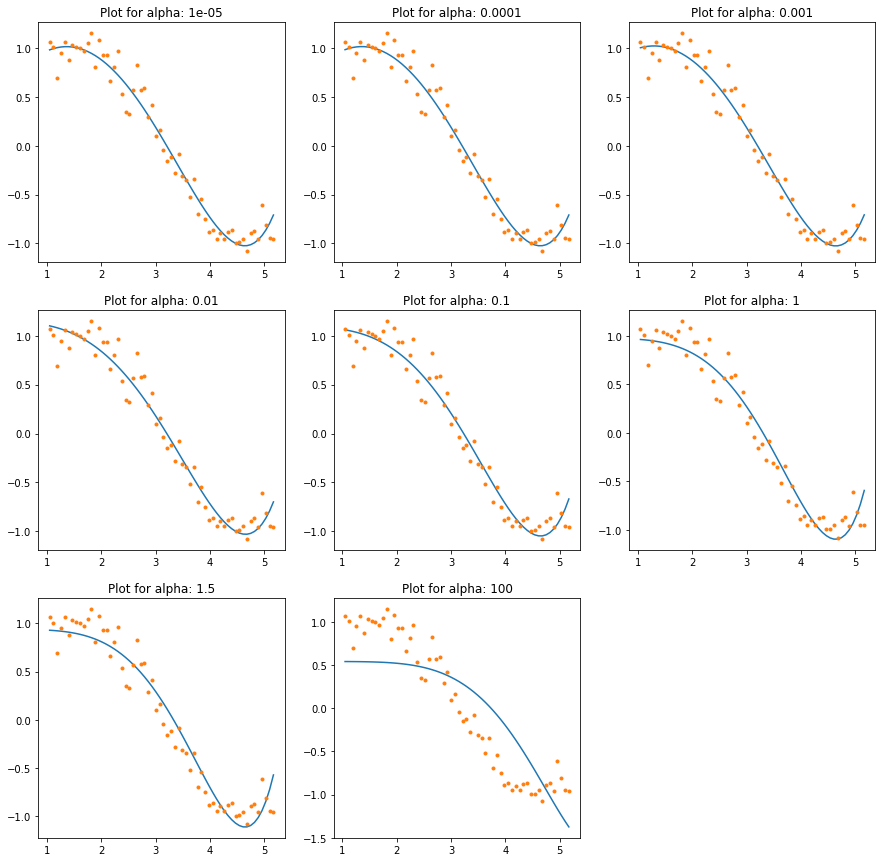

In [40]:
alpha_lasso = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1.5, 100]
_ = lasso_regression(data, 8, alpha_lasso)